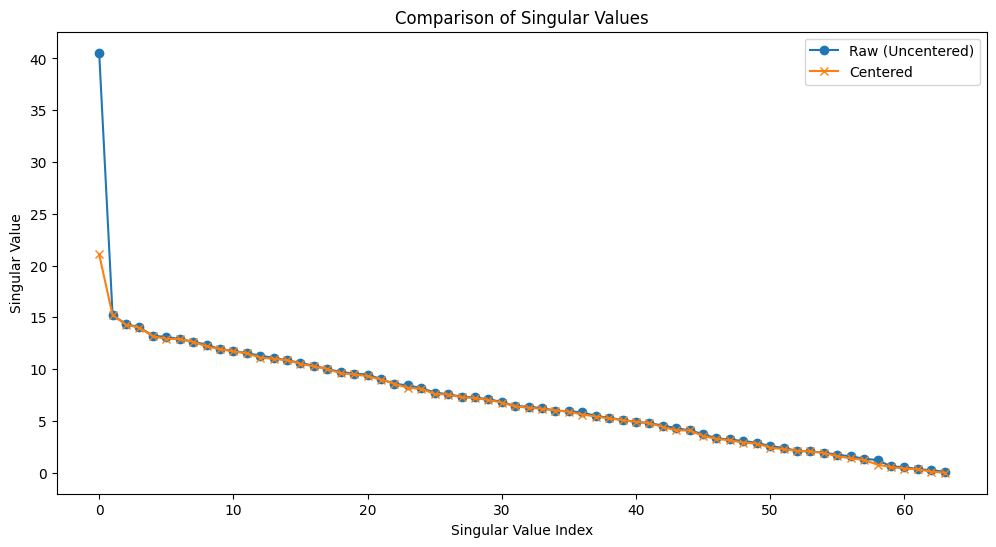

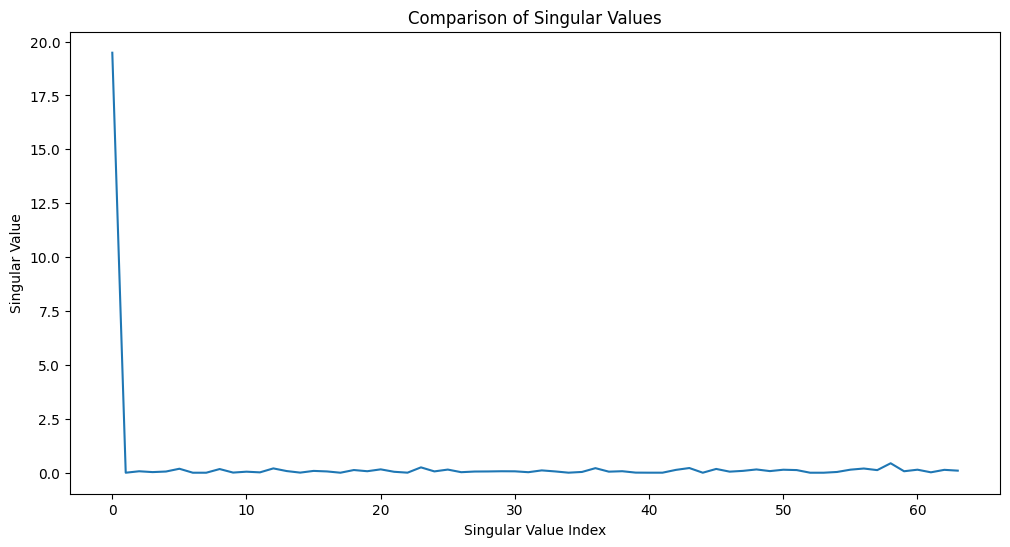

eRank (Raw)           48.413444
eRank (Centered)      50.423662
eRank (Covariance)    50.423662
dtype: float64

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N, D = 64, 64  # N samples, D-dimensional representation

# Step 1: Create a random matrix Z of shape (N, D)
Z = np.random.randn(N, D) + np.random.rand(N, 1)  # Adding a random offset to each row

# Step 2: Center the matrix (subtract mean along rows)
Z_mean = np.mean(Z, axis=0, keepdims=True)
Z_centered = Z - Z_mean  # Shape: (N, D)

# Step 3: Compute covariance matrix from centered matrix
# Note: Covariance matrix will be D x D
cov_matrix = (Z_centered.T @ Z_centered)   # Shape: (D, D)

# Step 4: Compute singular values
sv_raw = np.linalg.svd(Z, compute_uv=False)
sv_centered = np.linalg.svd(Z_centered, compute_uv=False)
eigen_cov = np.linalg.eigvalsh(cov_matrix)
sv_cov = np.sqrt(np.clip(eigen_cov, 0, None))  # Convert back to singular values

# Step 5: Compute eRank from singular values
def eRank(singular_values):
    sv = np.clip(singular_values, a_min=1e-12, a_max=None)  # Avoid division by zero
    probs = sv / np.sum(sv)
    entropy = -np.sum(probs * np.log(probs))
    return np.exp(entropy)

# Compute eRanks
erank_raw = eRank(sv_raw)
erank_centered = eRank(sv_centered)
erank_cov = eRank(sv_cov)

# Prepare comparison
plt.figure(figsize=(12, 6))
plt.plot(sv_raw, label='Raw (Uncentered)', marker='o')
plt.plot(sv_centered, label='Centered', marker='x')
#plt.plot(np.flip(sv_cov), label='Covariance-derived', marker='s')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Comparison of Singular Values')
plt.legend()
plt.show()

# Prepare comparison
plt.figure(figsize=(12, 6))
plt.plot(sv_raw - sv_centered)
#plt.plot(np.flip(sv_cov), label='Covariance-derived', marker='s')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Comparison of Singular Values')

plt.show()


# Add eRank summary
erank_summary = pd.Series({
    "eRank (Raw)": erank_raw,
    "eRank (Centered)": erank_centered,
    "eRank (Covariance)": erank_cov
})

erank_summary


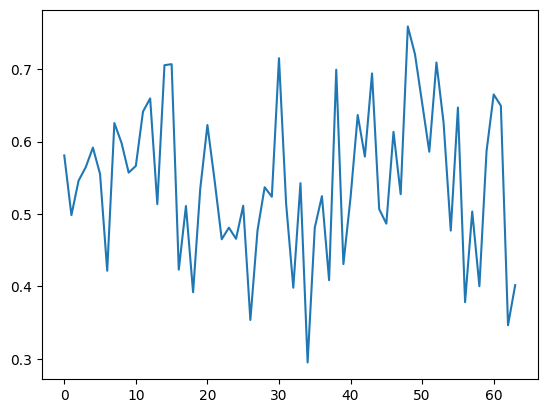

In [30]:
plt.plot(Z_mean.T)

In [16]:
(sv_raw - sv_centered)[: 3]

array([25.05825399,  0.34009284,  0.64763044])

In [20]:
np.linalg.norm(Z_mean) * np.sqrt(256)

54.15558725143085